In [1]:
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply
from skimage.io import imread, imshow, show
from skimage.transform import SimilarityTransform, warp, swirl
from scipy.ndimage import affine_transform
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import numpy as np

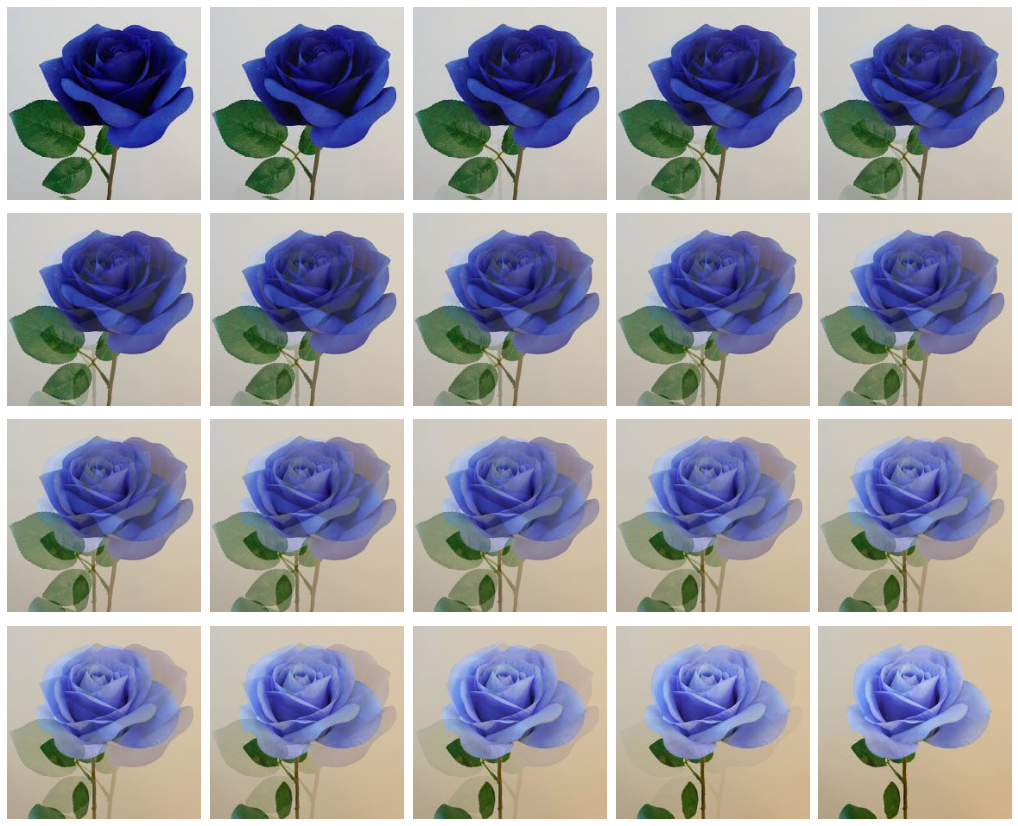

In [2]:
im1 = mpimg.imread("./flower1.jpg") / 255
im2 = mpimg.imread("./flower2.jpg") / 255
i = 1
plt.figure(figsize=(18,15))
for alpha in np.linspace(0,1,20):
    plt.subplot(4,5,i)
    plt.imshow((1-alpha)*im1 + alpha*im2)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [3]:
#informasi gambar
im3 = Image.open("bunga.jpg")
print (im3.width,im3.height, im3.mode, im3.format)

500 500 RGB JPEG


In [4]:
#cropping
im3_crop = im3.crop((175,75,320,200))
im3_crop.show()

In [5]:
#negative
im3_negative = im3.point(lambda x:255-x)
im3_negative.show()

In [6]:
#grayscale
im_grayscale = im3.convert('L')
im_grayscale.show()

In [7]:
#grayscale1
im_grayscale.point(lambda x: 255*np.log(1+x/255)).show()

In [8]:
#grayscale2
im_grayscale.point(lambda x: 255*(x/255)**0.6).show()

In [9]:
#reflecting
im3_rotate1 = im3.transpose(Image.FLIP_LEFT_RIGHT).show()
im3_rotate2 = im3.transpose(Image.FLIP_TOP_BOTTOM).show()

In [10]:
# rotate 45derajat
im3_rotate45 = im3.rotate(45).show()

In [11]:
#salt and pepper for noise
imcopy = im3.copy()
n = 5000
x, y = np.random.randint(0, imcopy.width, n), np.random.randint(0, imcopy.height,n)
for (x,y) in zip (x,y):
    imcopy.putpixel((x,y), ((0,0,0)) if np.random.rand() < 0.5 else (255,255,255))
imcopy.show()

In [12]:
#drawing on image
im4 = Image.open('./bunga.jpg')
draw = ImageDraw.Draw(im4)
draw.ellipse ((125, 125, 200, 250), fill= (255,255,255,128))
del draw
im4.show()

In [13]:
#drawing text on image
draw = ImageDraw.Draw(im4)
font = ImageFont.truetype("arial.ttf",23)
draw.text((10,5), "Welcome to image processing", font = font)
del draw
im4.show()

In [14]:
#superimposing 2 images
im1 = Image.open("./Flower1.jpg")
im2 = Image.open("./Flower2.jpg")
multiply(im1, im2).show()

In [15]:
#adding 2 images
add(im1, im2).show()

In [16]:
#subtracting 2 images
subtract(im1,im2).show()

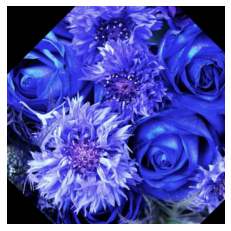

(<matplotlib.image.AxesImage at 0x1c9868101f0>,
 (-0.5, 499.5, 499.5, -0.5),
 None)

In [17]:
#affine tranformation on image
im = imread("./bunga.jpg")
tform = SimilarityTransform(scale=0.9, rotation=np.pi/4,translation=(im.shape[0]/2, -100))
warped = warp(im, tform)
plt.imshow(warped), plt.axis('off'), plt.show()

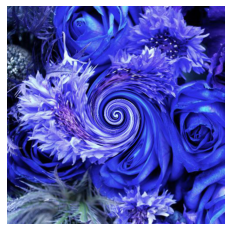

(<matplotlib.image.AxesImage at 0x1c983779610>,
 (-0.5, 499.5, 499.5, -0.5),
 None)

In [18]:
#swirl transform
im = imread("./bunga.jpg")
swirled = swirl(im, rotation=0, strength=15, radius=200)
plt.imshow(swirled), plt.axis('off'), plt.show()